In [1]:
# import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
import requests 
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":33.51,"feels_like":24.26,"temp_min":30.99,"temp_max":36,"pressure":1022,"humidity":48},"visibility":10000,"wind":{"speed":6.91,"deg":220},"clouds":{"all":90},"dt":1610405722,"sys":{"type":1,"id":3486,"country":"US","sunrise":1610367130,"sunset":1610400717},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 33.51,
  'feels_like': 24.26,
  'temp_min': 30.99,
  'temp_max': 36,
  'pressure': 1022,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 220},
 'clouds': {'all': 90},
 'dt': 1610405722,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610367130,
  'sunset': 1610400717},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 33.51,
  'feels_like': 24.26,
  'temp_min': 30.99,
  'temp_max': 36,
  'pressure': 1022,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 220},
 'clouds': {'all': 90},
 'dt': 1610405722,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610367130,
  'sunset': 1610400717},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1610367130,
 'sunset': 1610400717}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1610405722

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 36 48 90 6.91


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-11 22:55:22'

In [24]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | tilichiki
Processing Record 5 of Set 1 | tyup
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | matagami
Processing Record 9 of Set 1 | bud
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ryotsu
Processing Record 13 of Set 1 | agapovka
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | maldonado
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | olafsvik
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | port lincoln
Processing Record 24 of Set 1 | faanui
Processing Record 25 of Set 1 

Processing Record 38 of Set 4 | kysyl-syr
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 43 of Set 4 | tiarei
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | spokane
Processing Record 47 of Set 4 | juneau
Processing Record 48 of Set 4 | selma
Processing Record 49 of Set 4 | druzhba
Processing Record 50 of Set 4 | paka
Processing Record 1 of Set 5 | lovozero
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | sacramento
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | gorno-chuyskiy
City not found. Skipping...
Processing Record 6 of Set 5 | waimana
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | hithadhoo
Processing Record 9 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 10

Processing Record 27 of Set 8 | alice springs
Processing Record 28 of Set 8 | batagay
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | george
Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | tecoanapa
Processing Record 35 of Set 8 | mahesana
Processing Record 36 of Set 8 | zhigalovo
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | santo antonio do ica
Processing Record 39 of Set 8 | karaul
City not found. Skipping...
Processing Record 40 of Set 8 | maturin
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | grand centre
City not found. Skipping...
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | katobu
Processing Record 45 of Set 8 | teya
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | taltal
Processing Record 48 of Set 8 | prince rupert
Processing Record 

Processing Record 16 of Set 12 | kendari
Processing Record 17 of Set 12 | mecca
Processing Record 18 of Set 12 | springfield
Processing Record 19 of Set 12 | lata
Processing Record 20 of Set 12 | pasni
Processing Record 21 of Set 12 | whitehorse
Processing Record 22 of Set 12 | graaff-reinet
Processing Record 23 of Set 12 | wuwei
Processing Record 24 of Set 12 | severodvinsk
Processing Record 25 of Set 12 | gondanglegi
Processing Record 26 of Set 12 | ewa beach
Processing Record 27 of Set 12 | eureka
Processing Record 28 of Set 12 | xiaoweizhai
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | bonavista
Processing Record 31 of Set 12 | makasar
Processing Record 32 of Set 12 | roseburg
Processing Record 33 of Set 12 | borovskoy
Processing Record 34 of Set 12 | mackay
Processing Record 35 of Set 12 | gulshat
City not found. Skipping...
Processing Record 36 of Set 12 | skerries
Processing Record 37 of Set 12 | kinshasa
Processing Record 38 of Set 12 | yenagoa

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.6167,150.6667,85.15,71,98,8.08,PG,2021-01-11 22:55:35
1,Pevek,69.7008,170.3133,-32.06,85,27,1.97,RU,2021-01-11 22:55:35
2,Iqaluit,63.7506,-68.5145,6.80,78,90,2.86,CA,2021-01-11 22:55:35
3,Tilichiki,60.4667,166.1000,-18.78,86,95,11.30,RU,2021-01-11 22:55:37
4,Tyup,42.7276,78.3648,19.62,78,0,3.09,KG,2021-01-11 22:55:37
5,Cherskiy,68.7500,161.3000,-34.85,82,0,1.41,RU,2021-01-11 22:55:37
6,Bredasdorp,-34.5322,20.0403,66.20,94,100,9.22,ZA,2021-01-11 22:55:37
7,Matagami,49.7502,-77.6328,19.40,93,90,9.22,CA,2021-01-11 22:55:37
8,Bud,39.4470,-86.1758,25.00,89,0,5.93,US,2021-01-11 22:50:51
9,Atuona,-9.8000,-139.0333,77.43,81,5,16.26,PF,2021-01-11 22:55:38


In [27]:
#reorder columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samarai,PG,2021-01-11 22:55:35,-10.6167,150.6667,85.15,71,98,8.08
1,Pevek,RU,2021-01-11 22:55:35,69.7008,170.3133,-32.06,85,27,1.97
2,Iqaluit,CA,2021-01-11 22:55:35,63.7506,-68.5145,6.80,78,90,2.86
3,Tilichiki,RU,2021-01-11 22:55:37,60.4667,166.1000,-18.78,86,95,11.30
4,Tyup,KG,2021-01-11 22:55:37,42.7276,78.3648,19.62,78,0,3.09
...,...,...,...,...,...,...,...,...,...
533,Kinshasa,CD,2021-01-11 22:57:22,-4.3246,15.3215,78.80,78,100,3.44
534,Yenagoa,NG,2021-01-11 22:57:08,4.9247,6.2642,76.91,88,0,6.13
535,Fereydun Kenar,IR,2021-01-11 22:57:22,36.6864,52.5225,49.87,65,0,5.97
536,Glens Falls,US,2021-01-11 22:57:22,43.3095,-73.6440,26.01,93,90,2.55


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610405843.7600982

In [31]:
today = time.strftime("%x")
today

'01/11/21'

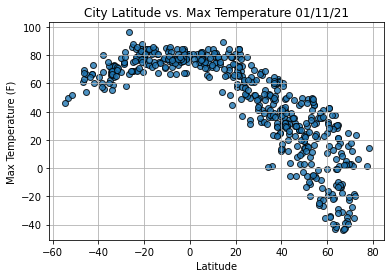

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

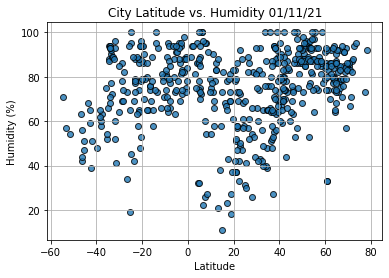

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

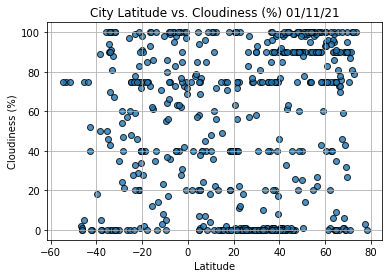

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

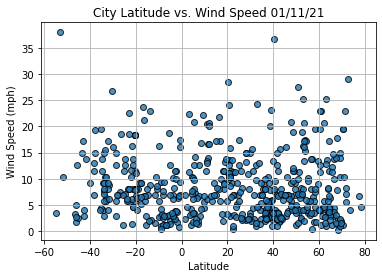

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
from scipy.stats import linregress

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
#     from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13 


City                      Sakakah
Country                        SA
Date          2021-01-11 22:54:51
Lat                       29.9697
Lng                       40.2064
Max Temp                       50
Humidity                       66
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
533    False
534     True
535     True
536     True
537     True
Name: Lat, Length: 538, dtype: bool

In [40]:
#return a dataframe with all data fitting the criteria for lats greate than or equal to zero 
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pevek,RU,2021-01-11 22:55:35,69.7008,170.3133,-32.06,85,27,1.97
2,Iqaluit,CA,2021-01-11 22:55:35,63.7506,-68.5145,6.80,78,90,2.86
3,Tilichiki,RU,2021-01-11 22:55:37,60.4667,166.1000,-18.78,86,95,11.30
4,Tyup,KG,2021-01-11 22:55:37,42.7276,78.3648,19.62,78,0,3.09
5,Cherskiy,RU,2021-01-11 22:55:37,68.7500,161.3000,-34.85,82,0,1.41
...,...,...,...,...,...,...,...,...,...
532,Skerries,IE,2021-01-11 22:57:21,53.5828,-6.1083,48.99,93,75,16.11
534,Yenagoa,NG,2021-01-11 22:57:08,4.9247,6.2642,76.91,88,0,6.13
535,Fereydun Kenar,IR,2021-01-11 22:57:22,36.6864,52.5225,49.87,65,0,5.97
536,Glens Falls,US,2021-01-11 22:57:22,43.3095,-73.6440,26.01,93,90,2.55


In [41]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

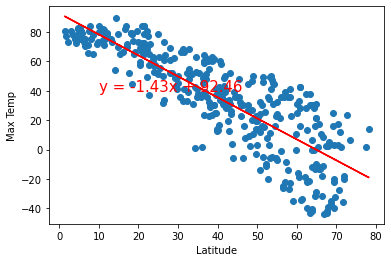

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

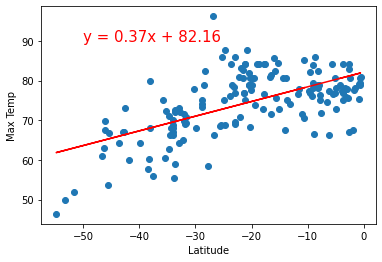

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

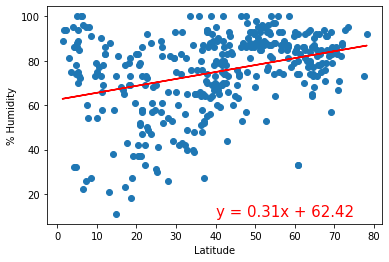

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

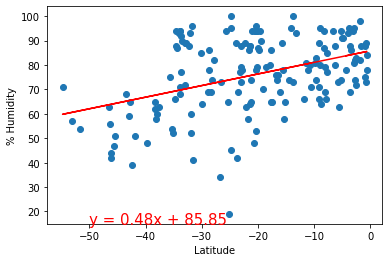

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

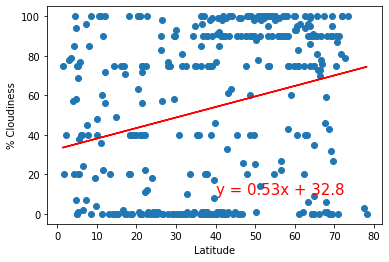

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

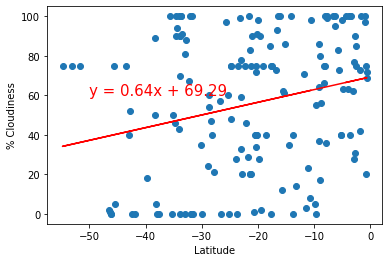

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

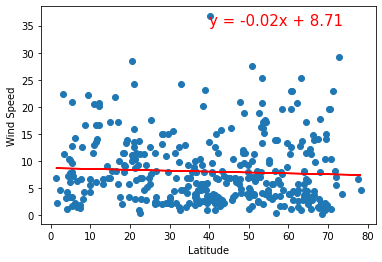

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

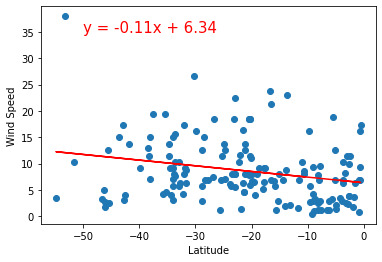

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [51]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [52]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Samarai,PG,2021-01-11 22:55:35,-10.6167,150.6667,85.15,71,98,8.08
1,1,Pevek,RU,2021-01-11 22:55:35,69.7008,170.3133,-32.06,85,27,1.97
2,2,Iqaluit,CA,2021-01-11 22:55:35,63.7506,-68.5145,6.80,78,90,2.86
3,3,Tilichiki,RU,2021-01-11 22:55:37,60.4667,166.1000,-18.78,86,95,11.30
4,4,Tyup,KG,2021-01-11 22:55:37,42.7276,78.3648,19.62,78,0,3.09


In [53]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [54]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [55]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [56]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# add a zoom level
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
#heat_layer = gmaps.heatmap_layer(locations, weights=temps)
#heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [60]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Samarai,PG,2021-01-11 22:55:35,-10.6167,150.6667,85.15,71,98,8.08
9,9,Atuona,PF,2021-01-11 22:55:38,-9.8000,-139.0333,77.43,81,5,16.26
20,20,Mount Isa,AU,2021-01-11 22:55:39,-20.7333,139.5000,87.80,48,1,8.05
23,23,Faanui,PF,2021-01-11 22:55:40,-16.4833,-151.7500,81.36,76,100,21.25
27,27,Marawi,PH,2021-01-11 22:55:40,7.9986,124.2928,75.00,95,85,3.00
28,28,Saint-Philippe,RE,2021-01-11 22:55:40,-21.3585,55.7679,77.00,88,20,4.61
39,39,Souillac,MU,2021-01-11 22:55:42,-20.5167,57.5167,78.80,94,40,18.41
42,42,Taganak,PH,2021-01-11 22:55:43,6.0833,118.3000,75.20,100,40,14.23
47,47,Cockburn Town,TC,2021-01-11 22:55:02,21.4612,-71.1419,78.80,73,40,11.50
48,48,Kahului,US,2021-01-11 22:55:44,20.8947,-156.4700,84.20,51,40,12.66


In [61]:
preferred_cities_df.count()

City_ID       143
City          143
Country       143
Date          143
Lat           143
Lng           143
Max Temp      143
Humidity      143
Cloudiness    143
Wind Speed    143
dtype: int64

In [62]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Samarai,PG,85.15,-10.6167,150.6667,
9,Atuona,PF,77.43,-9.8000,-139.0333,
20,Mount Isa,AU,87.80,-20.7333,139.5000,
23,Faanui,PF,81.36,-16.4833,-151.7500,
27,Marawi,PH,75.00,7.9986,124.2928,
28,Saint-Philippe,RE,77.00,-21.3585,55.7679,
39,Souillac,MU,78.80,-20.5167,57.5167,
42,Taganak,PH,75.20,6.0833,118.3000,
47,Cockburn Town,TC,78.80,21.4612,-71.1419,
48,Kahului,US,84.20,20.8947,-156.4700,


In [63]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10) 

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Samarai,PG,85.15,-10.6167,150.6667,
9,Atuona,PF,77.43,-9.8000,-139.0333,
20,Mount Isa,AU,87.80,-20.7333,139.5000,
23,Faanui,PF,81.36,-16.4833,-151.7500,
27,Marawi,PH,75.00,7.9986,124.2928,
28,Saint-Philippe,RE,77.00,-21.3585,55.7679,
39,Souillac,MU,78.80,-20.5167,57.5167,
42,Taganak,PH,75.20,6.0833,118.3000,
47,Cockburn Town,TC,78.80,21.4612,-71.1419,
48,Kahului,US,84.20,20.8947,-156.4700,


In [64]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [74]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except:
        print("Hotel not found... skipping.")
                                                             
        

IndexError: list index out of range

In [66]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{column1}</dd>
<dt>Another name</dt><dd>{column2}</dd>
</dl>
"""

In [69]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [70]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [71]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))